<a href="https://colab.research.google.com/github/DanielaaVargas/NINE/blob/main/NGC5258.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages installation and import**


In [16]:
%%capture
!pip install astropy==5.3;
!pip install pyregion;
!pip install photutils;
!pip install regions;
!pip install scipy;
!pip install aplpy;

import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
import pyregion
from astropy.coordinates import Angle
from astropy import units as u
from astropy.stats import SigmaClip
from photutils.background import StdBackgroundRMS
from regions import Regions
from pyregion import get_mask
import aplpy
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

#**Galaxy NGC5258 Display with aplpy**

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'.
INFO:astropy:Auto-setting vmin to -1.075e-04
INFO:astropy:Auto-setting vmax to  5.704e-04


INFO: Auto-setting vmin to -1.075e-04 [aplpy.core]
INFO: Auto-setting vmax to  5.704e-04 [aplpy.core]


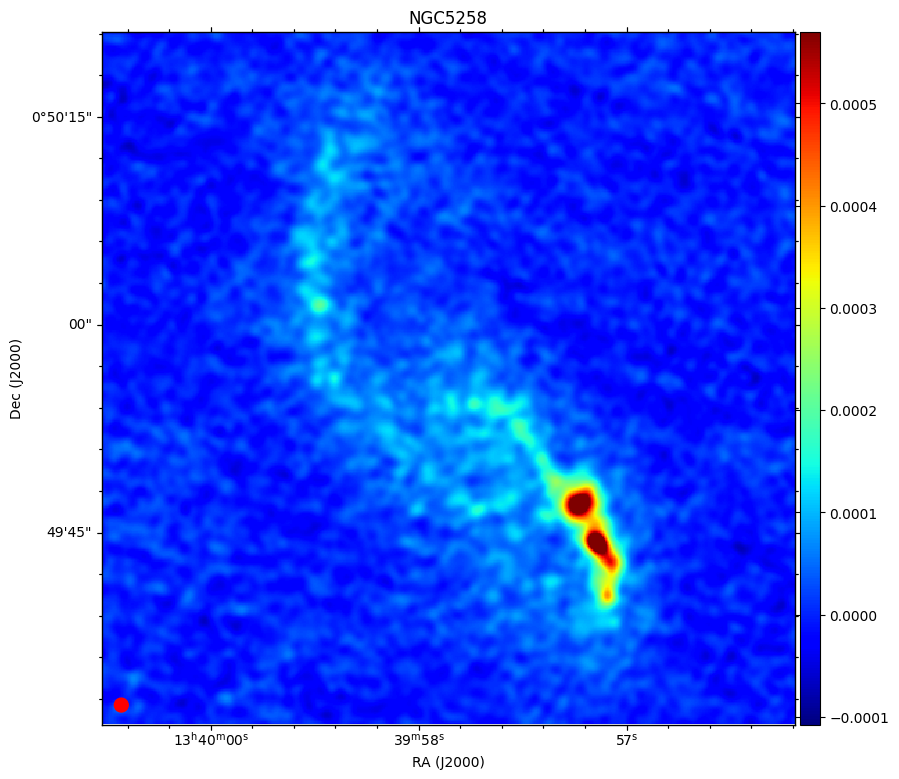

In [2]:
path = '/content/drive/MyDrive/NINE/Imaging/'

Image = path + 'NGC5258.fits'

iMg = aplpy.FITSFigure(Image)
iMg.set_title("NGC5258")
iMg.show_colorscale(cmap='jet')
iMg.add_colorbar()
#iMg.add_grid()
iMg.add_beam()
iMg.beam.set_color('red')

# **Header Data Unit (HDU)**

This shows the metadata and information about the fits file.

In [3]:
IMG = fits.open(Image)  #HDU List
PrimaryHDU = IMG[0]     #PrimaryHDU object

print(IMG)
print(IMG.info())
print(PrimaryHDU)

print('\nTotal intensity: ', PrimaryHDU.data.sum(), '\n')

PrimaryHDU.data

Filename: /content/drive/MyDrive/NINE/Imaging/NGC5258.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     464   (500, 500)   float32   
None

Total intensity:  3.587452 



array([[-8.42795816e-06, -3.88800254e-06,  8.59378986e-07, ...,
        -1.60543896e-05, -9.20454568e-06, -3.89002980e-06],
       [-6.05034165e-06, -1.99048918e-06,  2.53755479e-06, ...,
        -1.41792461e-05, -7.44180943e-06, -1.89061109e-06],
       [-4.39967926e-06, -6.59264344e-07,  3.81479958e-06, ...,
        -1.35508508e-05, -7.15010765e-06, -1.43404975e-06],
       ...,
       [ 3.28053102e-06,  8.53455276e-06,  1.23046302e-05, ...,
        -1.65220354e-05, -1.59263218e-05, -1.60143027e-05],
       [-4.76962805e-06, -1.61062246e-07,  3.38781524e-06, ...,
        -1.56560654e-05, -1.48928502e-05, -1.47071187e-05],
       [-1.40863476e-05, -1.02853055e-05, -6.93907532e-06, ...,
        -1.26009099e-05, -1.17542404e-05, -1.14344302e-05]], dtype='>f4')

In [4]:
header = PrimaryHDU.header
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  500                                                  
NAXIS2  =                  500                                                  
BMAJ    =   2.777777777778E-04                                                  
BMIN    =   2.777777777778E-04                                                  
BPA     =   0.000000000000E+00                                                  
BTYPE   = 'Intensity'                                                           
OBJECT  = 'NGC 5257/8'                                                          
BUNIT   = 'Jy/beam '           /Brightness (pixel) unit                         
EQUINOX =   2.000000000000E+03                                                  
RADESYS = 'FK5     '        

# **Noise Characterization**

It is possible to calculate the average noise of a fits file.

In [11]:
Regions = path + 'DS9.reg'

vla = fits.getdata(Image)
data = PrimaryHDU.data
print(vla.shape, '\n')

reg = pyregion.open(Regions)
reg

(500, 500) 



[Shape : circle ( Number(53),Number(419),Number(20) ),
 Shape : circle ( Number(393),Number(449),Number(19.932905) ),
 Shape : circle ( Number(441),Number(320),Number(27.573967) ),
 Shape : circle ( Number(38.456),Number(60.92),Number(24.447757) ),
 Shape : circle ( Number(145.592),Number(54.008),Number(23.584063) ),
 Shape : circle ( Number(453.176),Number(107.576),Number(14.395013) ),
 Shape : circle ( Number(73.016),Number(192.248),Number(53.362276) ),
 Shape : circle ( Number(373.688),Number(352.952),Number(39.456229) )]

In [6]:
rms_values = []
for n in range(len(reg)):
  reg = pyregion.open(Regions)
  m=len(reg)
  del reg[0:n]  #deletes only the first element of the list in each loop
  del reg[1:m]  #leaves only the first element of the list in each loop
  mask = reg.get_mask(shape = vla.shape, header = header)
  mask = get_mask(reg, data)
  maskdata = np.multiply(vla, mask)
  N = len(maskdata[maskdata!=0])
  rms_values.append(np.sqrt(np.sum(maskdata**2)/N))
avg_rms = np.mean(rms_values)
avg_rms  #Average noise

1.8055913129607442e-05

In [7]:
maskdata[maskdata!=0]
mask[1][mask[1]==True]
maskdata

array([[-0., -0.,  0., ..., -0., -0., -0.],
       [-0., -0.,  0., ..., -0., -0., -0.],
       [-0., -0.,  0., ..., -0., -0., -0.],
       ...,
       [ 0.,  0.,  0., ..., -0., -0., -0.],
       [-0., -0.,  0., ..., -0., -0., -0.],
       [-0., -0., -0., ..., -0., -0., -0.]], dtype=float32)

Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]
Set OBSGEO-B to    34.078827 from OBSGEO-[XYZ].
Set OBSGEO-H to     2115.607 from OBSGEO-[XYZ]'.



How many contours do you want to do? 3

	CONTOUR 1
How many average rms above? 3

Color pink



	CONTOUR 2
How many average rms above? 5

Color black



	CONTOUR 3
How many average rms above? 7

Color black


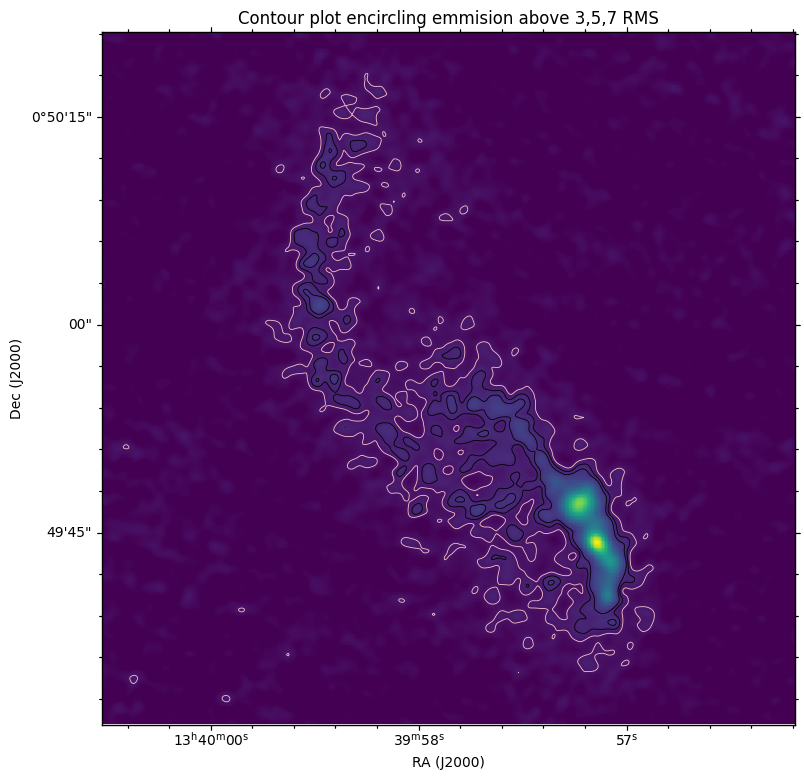

In [8]:
fig = aplpy.FITSFigure(Image)
fig.show_colorscale(vmin=0, vmax=np.max(vla), stretch='linear')

contours = int(input('\nHow many contours do you want to do? '))
rms = []
for n in range(contours):
  n = int(input(f'\n\tCONTOUR {n+1}\nHow many average rms above? '))
  color = input('\nColor ')
  fig.show_contour(data=vla, levels=[n*avg_rms], colors=[color], linewidths=0.6)
  rms.append(n)

rms_string = ','.join(map(str, rms))
fig.set_title(f'Contour plot encircling emmision above {rms_string} RMS')

# **Photometry**

This refers to the measurement of the intensity of the source.

In [15]:
# Parameters (in degrees) from the header
bmaj_deg = header['BMAJ']
bmin_deg = header['BMIN']
pxSize = header['CDELT1']

# Area of a Gaussian Beam in square degrees
beam_deg = np.pi * bmaj_deg * bmin_deg / (4*np.log(2))

# Conversion: Beam's area to square pixels
px_deg = pxSize**2
beam_px = beam_deg / px_deg
print("Area of the beam in pixels: ", beam_px)

# Considering a pixel significant if its emission is above 3-sigma
signif_px = vla[vla > 3 * avg_rms]

# The total emission is given by the sum of the significant pixels
T_emission_jy = np.sum(signif_px)  # S_v in Jy
print("\nTotal emission of the galaxy in Jy:", T_emission_jy)

# TOTAL LUMINOSITY (energy per unit time hitting a detector) in solar luminosities

d_pc = 98e6  # distance between Earth and the NGC5258 galaxy
d_cm = d_pc*3.086e18
T_emission_erg = (T_emission_jy / beam_px)*1e-23  #B_v in erg
solarluminosity = 3.827e33 # Conversion factor: solar luminosities in erg/s
T_luminosity_sl = T_emission_erg * 4 * np.pi * d_cm**2 / solarluminosity
"""This is a conversion from erg to sl, and multiplying by the sun's
   surface area eliminates the area factor from the total emission B_v"""

print("\nTotal luminosity in solar luminosities:", T_luminosity_sl)

#total_emission_erg
print('\nTotal emission in Jy: ', T_emission_jy/beam_px) #also eliminates the area factor from S_v

Area of the beam in pixels:  113.30900354567986

Total emission of the galaxy in Jy: 3.0696259

Total luminosity in solar luminosities: 8.136102672024403e-05

Total emission in Jy:  0.027090749705999187


# **Data Cubes**

In [127]:
Cube = fits.open(path + 'NGC5258_cube.fits')[0]
print(Cube)

#data and header
Cb_data = Cube.data
Cb_header = Cube.header

print(Cb_data.shape)  # (n_channels, n_y_pixels, n_x_pixels)
"""NAXIS is a keyword specifying the number of dimensions in the data array.
    It is part of the header of the FITS file."""
n_channels = Cb_header['NAXIS3']
n_y_pixels = Cb_header['NAXIS2']
n_x_pixels = Cb_header['NAXIS1']

with fits.open(path + 'NGC5258_cube.fits') as hdul:
    primary_header = hdul[0].header

header_list = [(key, primary_header[key], primary_header.comments[key]) for key in primary_header]

df = pd.DataFrame(header_list, columns = ['Keyword', 'Value', 'Comment'])

print(df.head(51))

(250, 500, 500)
     Keyword                       Value                     Comment
0     SIMPLE                        True   conforms to FITS standard
1     BITPIX                         -32             array data type
2      NAXIS                           3  number of array dimensions
3     NAXIS1                         500                            
4     NAXIS2                         500                            
5     NAXIS3                         250                            
6       BMAJ                    0.000278                            
7       BMIN                    0.000278                            
8        BPA                         0.0                            
9      BTYPE                   Intensity                            
10    OBJECT                    NGC_5258                            
11     BUNIT                     Jy/beam                            
12   RADESYS                        ICRS                            
13   LONPOLE      

In [143]:
print(Cb_data[1,:,:])
V_d = (1-Cb_header['CRVAL3']/Cb_header['RESTFRQ'])*2.99999e5                                                 #converts central freq to velocity
V_u = (1-(Cb_header['CRVAL3'] + Cb_header['CDELT3']*Cb_header['NAXIS3'])/Cb_header['RESTFRQ'])*2.99999e5     #calculates the lower frequency
deltaV = (V_u - V_d)/Cb_header['NAXIS3']

print("\nV_d:", V_d, "\nV_u:", V_u, "\ndeltaV:", deltaV)

print('\nThe number of channels in the data cube is: ' + str(n_channels))

[[       nan        nan        nan ... 0.02904355 0.03236155 0.03454045]
 [       nan        nan        nan ... 0.03176667 0.03614488 0.03919604]
 [       nan        nan        nan ... 0.03324928 0.03850854 0.04231478]
 ...
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]
 [       nan        nan        nan ...        nan        nan        nan]]

V_d: 5548.820227517398 
V_u: 6799.681414953371 
deltaV: 5.003444749743893

The number of channels in the data cube is: 250


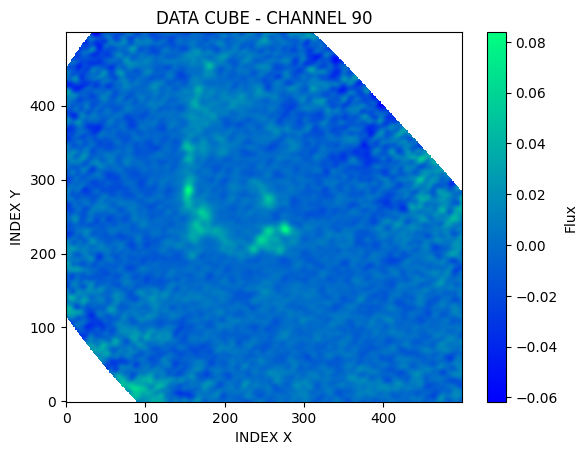

In [126]:
# This is a slice of the cube at channel 90,
# This shows the emission from the galaxy at the corresponding velocity at that slice

channel_index = 90
plt.imshow(Cb_data[channel_index], origin='lower', cmap='winter', aspect='auto')

#set labels
plt.xlabel('INDEX X')
plt.ylabel('INDEX Y')
plt.title(f'DATA CUBE - CHANNEL {channel_index}')

#show the figure of cube
plt.colorbar(label='Flux')

In [69]:
vla_cube = fits.getdata(path + 'NGC5258_cube.fits')

#region_cube = path + 'add the file.reg'
region1 = pyregion.open(region_cube)
region1

[Shape : circle ( Number(53),Number(419),Number(20) ),
 Shape : circle ( Number(393),Number(449),Number(19.932905) ),
 Shape : circle ( Number(441),Number(320),Number(27.573967) ),
 Shape : circle ( Number(38.456),Number(60.92),Number(24.447757) ),
 Shape : circle ( Number(145.592),Number(54.008),Number(23.584063) ),
 Shape : circle ( Number(453.176),Number(107.576),Number(14.395013) ),
 Shape : circle ( Number(73.016),Number(192.248),Number(53.362276) ),
 Shape : circle ( Number(373.688),Number(352.952),Number(39.456229) )]

# **Emission Lines**

# **Moment Maps**